In [5]:
import pandas as pd
df = pd.read_csv('c:/data/convenience/origin/openclose.csv', encoding='ANSI')
df.head()

,기준년코드,기준분기코드,상권구분코드,상권구분코드명,상권코드,상권코드명,서비스업종코드,서비스업종코드명,점포수,유사업종점포수,개업율,개업점포수,폐업률,폐업점포수,프랜차이즈점포수
0,2015,1,D,발달상권,1001058,역삼역_1,CS300002,편의점,0,4,0,0,0,0,4
1,2015,1,A,골목상권,1000163,자양로53길,CS300002,편의점,0,3,0,0,0,0,3
2,2015,1,D,발달상권,1001230,인사동,CS300002,편의점,1,11,0,0,9,1,10
3,2015,1,A,골목상권,1000199,장한로27가길,CS300002,편의점,1,3,0,0,0,0,2
4,2015,1,D,발달상권,1001140,서울 강남구 압구정역,CS300002,편의점,5,19,0,0,0,0,14


In [6]:
df.columns

Index(['기준년코드', '기준분기코드', '상권구분코드', '상권구분코드명', '상권코드', '상권코드명', '서비스업종코드',
       '서비스업종코드명', '점포수', '유사업종점포수', '개업율', '개업점포수', '폐업률', '폐업점포수',
       '프랜차이즈점포수'],
      dtype='object')

In [7]:
y_open_df = df[['기준년코드', '개업점포수']]
#연도별 개업 점포 수 총합 계산
y_open_df = y_open_df.groupby(by=['기준년코드']).sum()
print(y_open_df)

y_open_per_df = df[['기준년코드', '개업율']]
#연도별 개업율 평균 계산
y_open_per_df = y_open_per_df.groupby(by=['기준년코드']).mean() 
print(y_open_per_df)

       개업점포수
기준년코드       
2015    1070
2016    1141
2017     985
2018     758
2019     693
            개업율
기준년코드          
2015   4.614833
2016   5.014440
2017   4.030784
2018   3.047002
2019   2.696936


In [8]:
y_close_df = df[['기준년코드', '폐업점포수']]
#연도별 폐업 점포 수 총합 계산
y_close_df = y_close_df.groupby(by=['기준년코드']).sum()
print(y_close_df)

y_close_per_df = df[['기준년코드', '폐업률']]
#연도별 폐업률 평균 계산
y_close_per_df = y_close_per_df.groupby(by=['기준년코드']).mean()
print(y_close_per_df)

       폐업점포수
기준년코드       
2015     701
2016     749
2017     791
2018     865
2019     880
            폐업률
기준년코드          
2015   3.362510
2016   3.223067
2017   3.231157
2018   3.694301
2019   4.025655


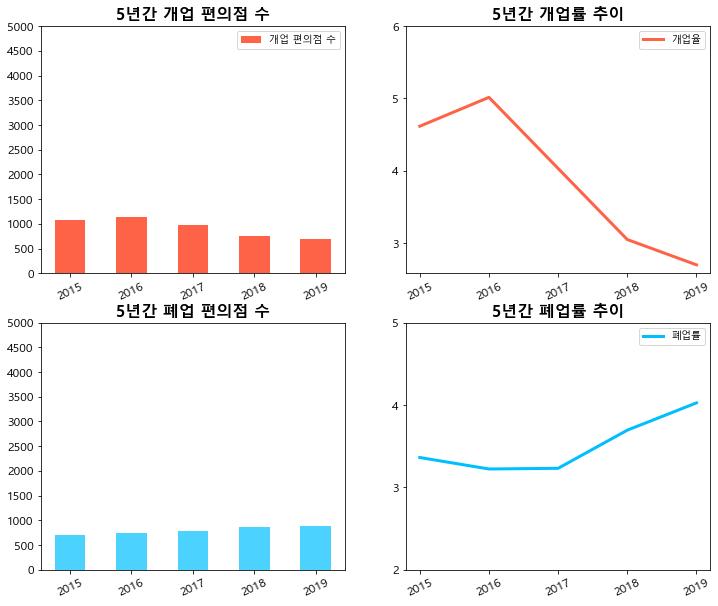

In [9]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

plt.figure(figsize=(12, 10))
plt.subplot(2,2,1)
plt.bar(range(2015, 2020), y_open_df['개업점포수'], color='tomato', width=0.5)
plt.title("5년간 개업 편의점 수", size=16, weight="bold")
plt.xticks(fontsize=12, rotation=25)
plt.yticks(range(0, 5001, 500), fontsize=12)
plt.legend(['개업 편의점 수'])

plt.subplot(2,2,2)
plt.plot(y_open_per_df, color='tomato', linewidth=3)
plt.title("5년간 개업률 추이", size=16, weight="bold")
plt.xticks(range(2015, 2020), fontsize=12, rotation=25)
plt.yticks(range(3, 7), fontsize=12)
plt.legend(['개업율'])

plt.subplot(2,2,3)
plt.bar(range(2015, 2020), y_close_df['폐업점포수'], color='deepskyblue', width=0.5, alpha=0.7)
plt.title("5년간 폐업 편의점 수", size=16, weight="bold")
plt.xticks(fontsize=12, rotation=25)
plt.yticks(range(0, 5001, 500), fontsize=12)

plt.subplot(2,2,4)
plt.plot(y_close_per_df, color='deepskyblue', linewidth=3)
plt.title("5년간 폐업률 추이", size=16, weight="bold")
plt.xticks(range(2015, 2020), fontsize=12, rotation=25)
plt.yticks(range(2, 6), fontsize=12)
plt.legend(['폐업률'])
plt.show()

In [10]:
q_open_df = df[['기준년코드', '기준분기코드', '개업점포수', '폐업점포수']]
#분기별 개업 점포 수 총합 계산
q_open_df = q_open_df.groupby(by=['기준년코드', '기준분기코드']).sum()
index=[]
#분기로 index 수정
for i in q_open_df.index:
    index.append(f'{i[0]-2000}년 {i[1]}분기')
q_open_df.index = index
print(q_open_df)

         개업점포수  폐업점포수
15년 1분기    185    146
15년 2분기    296    174
15년 3분기    268    172
15년 4분기    321    209
16년 1분기    246    193
16년 2분기    278    152
16년 3분기    300    182
16년 4분기    317    222
17년 1분기    245    207
17년 2분기    287    188
17년 3분기    266    190
17년 4분기    187    206
18년 1분기    202    237
18년 2분기    189    219
18년 3분기    166    214
18년 4분기    201    195
19년 1분기    173    230
19년 2분기    223    206
19년 3분기    154    213
19년 4분기    143    231


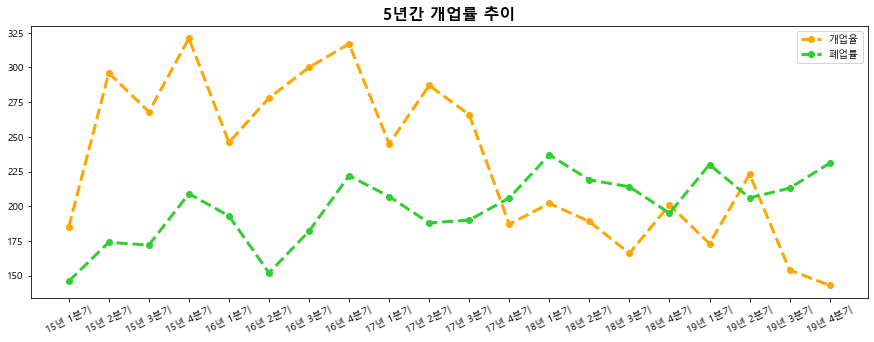

In [11]:
plt.figure(figsize=(15, 5))
plt.plot(q_open_df[['개업점포수']], linewidth=3, c='orange', marker='o', linestyle='--')
plt.plot(q_open_df[['폐업점포수']], linewidth=3, c='limegreen',  marker='o', linestyle='--')
plt.title("5년간 개업률 추이", size=16, weight="bold")
plt.xticks(rotation=25)
plt.legend(['개업율', '폐업률'])